In [1]:
import pandas as pd
import json
from tqdm import tqdm
import hashlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('./item.csv', encoding='utf-8')
df.head() 

,wine_id,name,food,grapes,rating_count,rating_average,label_count,review_count,body,alcohol,...,rose hip,brioche,dark fruit,butterscotch,creme fraiche,starfruit,wild iris,marjoram,cherry cough syrup,butter
0,1938520,1882 Cabernet Sauvignon,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",['Cabernet Sauvignon'],1697,4.1,14879,16,5.0,14.5,...,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14604,Les Bessards Hermitage,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",['Shiraz/Syrah'],1078,4.3,5370,3,5.0,14.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1930757,Patriarch Estate Grown,"['Beef', 'Lamb', 'Veal', 'Poultry']","['Cabernet Sauvignon', 'Merlot']",1072,4.6,6042,25,4.0,14.2,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1564280,Merlot,"['Beef', 'Lamb', 'Veal']",['Merlot'],3577,4.3,18748,52,4.0,14.4,...,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2576427,Cabernet Sauvignon F Block,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",['Cabernet Sauvignon'],115,4.4,806,1,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(50860, 562)

# EDA

In [35]:
wine_data['alcohol'].sort_values(ascending=False)

6875     135.0
1125     114.5
31512    112.0
28962     80.0
36541     45.0
         ...  
25777      0.0
25772      0.0
25769      0.0
25765      0.0
50859      0.0
Name: alcohol, Length: 50860, dtype: float64

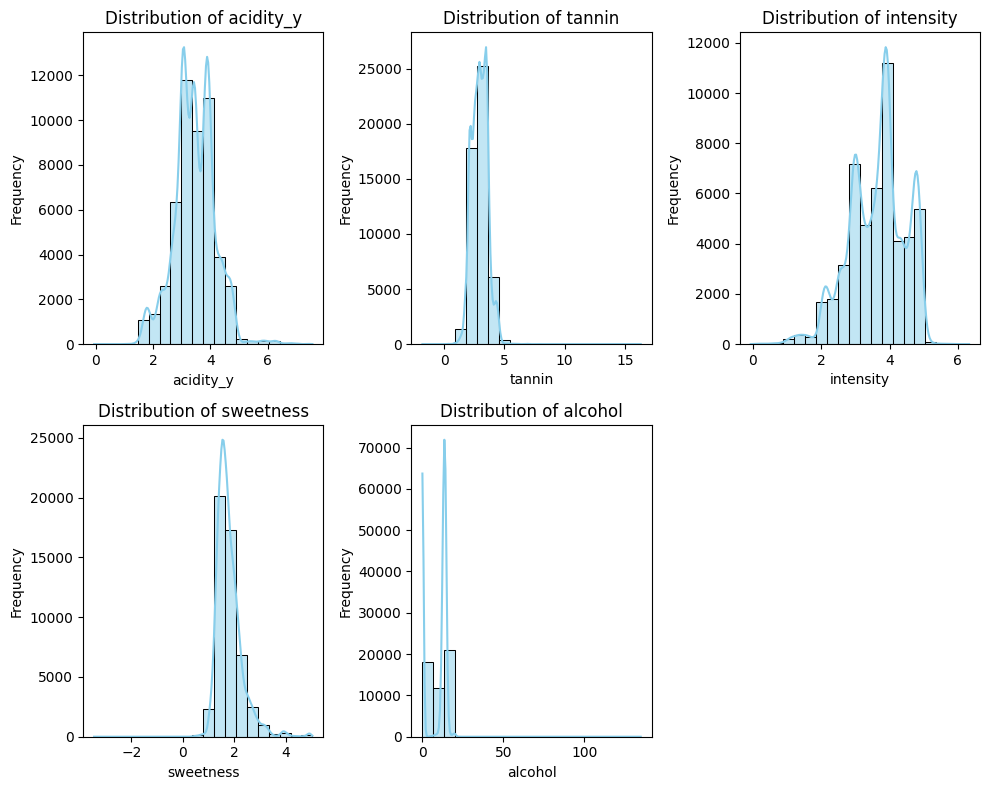

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 특성 선택 ('Body', 'Acidity', 'Tannin', 'Intensity', 'Sweetness')
wine_features = df[['acidity_y', 'tannin', 'intensity', 'sweetness', 'alcohol']]

# Step 2: 히스토그램과 KDE 시각화
plt.figure(figsize=(10, 8))  # 그래프의 전체 크기 설정

# 각 수치형 컬럼에 대해 히스토그램 및 KDE 플롯 생성
for i, column in enumerate(wine_features.columns, 1):
    plt.subplot(2, 3, i)  # 2행 3열의 플롯으로 설정
    sns.histplot(wine_features[column], kde=True, bins=20, color='skyblue')  # 히스토그램과 KDE 함께 그림
    plt.title(f'Distribution of {column}')  # 각 플롯의 제목 설정
    plt.xlabel(column)  # x축 라벨 설정
    plt.ylabel('Frequency')  # y축 라벨 설정

plt.tight_layout()  # 플롯 간 간격 자동 조정
plt.show()  # 그래프 출력

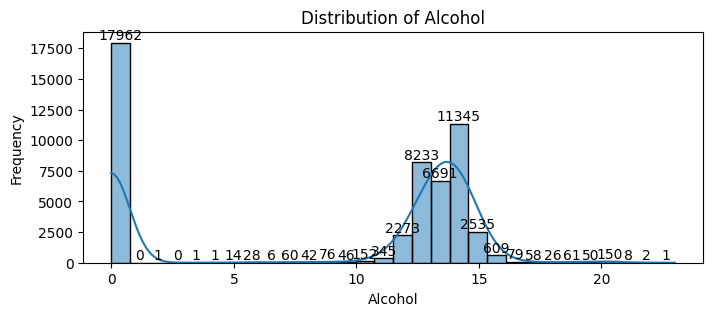

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator


# 데이터프레임에서 가격이 특정 구간에 있는 데이터만 선택
filtered_df = df[df['alcohol'] <= 30]

# 히스토그램과 KDE 플롯 그리기
plt.figure(figsize=(8, 3))
ax = sns.histplot(filtered_df['alcohol'], bins=30, kde=True)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# 각 히스토그램 막대 위에 빈도 수를 텍스트로 추가
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

In [37]:
wine_data['type_id'].value_counts()

type_id
1     35127
2     10950
3      2721
4      1003
7       542
24      469
25       48
Name: count, dtype: int64

In [39]:
wine_data[wine_data['type_id']==25]

,wine_id,name,food,grapes,rating_count,rating_average,label_count,review_count,body,alcohol,...,rose hip,brioche,dark fruit,butterscotch,creme fraiche,starfruit,wild iris,marjoram,cherry cough syrup,butter
1737,2792474,Y'a Bon The Canon,NaN,NaN,491,3.9,1322,44,4.239517,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2161,1313070,Limoncello Soleggio,NaN,NaN,691,4.2,5945,163,4.277050,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3522,4988688,39 Junmai Daiginjo Sake,NaN,NaN,1239,4.3,9343,365,3.452877,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5012,1794943,Camus Cognac Vsop Elegance,NaN,NaN,352,4.2,4771,69,4.281955,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8259,1216609,Ron Antiguo Diplomatico Exclusiva Reserva,NaN,NaN,1365,4.5,12885,211,4.320647,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8893,1184009,Deus Cuvée Prestige Brut Des Flandres,NaN,NaN,1308,4.3,6602,70,4.287062,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9019,1176947,The Macallan Fine Oak,NaN,NaN,2382,4.4,38634,220,4.306652,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9531,1165917,Diplomatico,NaN,NaN,2957,4.4,26953,362,4.309129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9683,1231137,Santa Teresa Ron Antiguo de Solera,NaN,NaN,593,4.4,5585,47,3.937903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10050,2042774,Glenfiddich Collection,NaN,NaN,2059,4.3,44402,412,4.322648,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pd.options.display.max_columns = None

In [19]:
df.head(1)

,wine_id,name,food,grapes,rating_count,rating_average,label_count,review_count,body,alcohol,winery_ratings_count,winery_ratings_average,winery_labels_count,winery_wines_count,Aperitif,Appetizers and snacks,Blue cheese,Cured Meat,Fruity desserts,Game,Goat cheese,Lamb,Lean fish,Mature and hard cheese,Mild and soft cheese,Mushrooms,Pasta,Pork,Poultry,Rich fish,Shellfish,Spicy food,Sweet desserts,Veal,Vegetarian,Beef,Blue cheese.1,Fruity desserts.1,Game .1,Lamb.1,Mature and hard cheese.1,Pasta.1,Pork.1,Poultry.1,Rich fish .1,Shellfish.1,Spicy food.1,Sweet desserts.1,Veal.1,Vegetarian.1,None,red_fruit_count,red_fruit_score,red_fruit_mentions_count,citrus_fruit_count,citrus_fruit_score,citrus_fruit_mentions_count,non_oak_count,non_oak_score,non_oak_mentions_count,tree_fruit_count,tree_fruit_score,tree_fruit_mentions_count,microbio_count,microbio_score,microbio_mentions_count,earth_count,earth_score,earth_mentions_count,oak_count,oak_score,oak_mentions_count,black_fruit_count,black_fruit_score,black_fruit_mentions_count,vegetal_count,vegetal_score,vegetal_mentions_count,spices_count,spices_score,spices_mentions_count,floral_count,floral_score,floral_mentions_count,tropical_fruit_count,tropical_fruit_score,tropical_fruit_mentions_count,dried_fruit_count,dried_fruit_score,dried_fruit_mentions_count,acidity_y,fizziness,intensity,sweetness,tannin,user_structure_count,calculated_structure_count,grapes_id,region_id,country_code,type_id,winery_id,segment,curry spice,pepper,pencil shavings,barbecue meat,wet slate,jasmine green tea,slate,spice cake,kerosene,acai berry,chocolate,minerals,brown butter,thai basil,radicchio,strawberry sauce,wax,cherry syrup,papaya,cola,blackberry,ground coffee,gardenia,rubber cement,incense smoke,apple,fennel,green pear,pie crust,wild blueberry,lime,tomato leaf,toffee,lemon curd,fruit cup,huckleberry,marionberry,black walnut,red currant,yellow raisin,quince paste,honeysuckle,dried herbs,peach,baked apple,blueberry,stone,tree bark,star anise,fresh coconut,acidity_x,dried apricot,stewed apricot,unripe pear,citrus blossom,graham cracker,oak,espresso,smoke,black raspberry,ginger,toast,candied ginger,yogurt,cigar,red beet,forest floor,bell pepper,pea shoot,biscuit,yellow beet,quinine,pine bark,bergamot,fig,pomegranate,straw,peony,tarragon,white pepper,banana,dried cranberry,jackfruit,cracked pepper,grapefruit,watermelon,grapefruit pith,dried red chili,nectarine,orange,pine nut,juniper,underbrush,lemon grass,barbecue smoke,green melon,rhubarb,burnt caramel,hoisin,lemon,hibiscus,lilac,walnut,walnut oil,dried fig,key lime,earl grey tea,lemon zest,parmesan cheese,forest mushroom,charcoal,bread yeast,cream,smoked meats,violet,chalk,camphor,lime peel,pipe tobacco,coconut,green bell pepper,chewing tobacco,caramel popcorn,sourdough,cocoa nib,aleppo pepper,citrus zest,dandelion,prune,fresh bread,exotic spice,arugula,castelvetrano olive,hay,sourdough yeast,sweaty,plum sauce,chamomile,lily,juniper berry,green papaya,yerba mate,crushed rocks,marzipan,almond,mission fig,chard,red bell pepper,raspberry,mandarin orange,strawberry,yellow peach,cheese,cured meat,molasses,lavender,roasted meat,curd,elderflower,orange peel,licorice,sweet and sour sauce,red licorice,wood smoke,asian pear,pink lady apple,salted butter,volcanic rock,mushroom,ripe strawberry,wet gravel,bilberry,pastry,spiced plum,red cherry,toasted almond,cherry,chervil,lanolin,lychee,pastrami,guava,campfire,grass,rooibos,bramble,cotton candy,oregano,green mango,clove,tobacco,dried blackberry,blackcurrant jam,hickory,cherry cola,rubber,honeycomb,beeswax,perfume,yeast,dried chili pepper,truffle,sour cherry pie,dried rose,peanut shell,cinnamon,apricot jam,vanilla,yellow plum,hazelnut cream,apple blossom,cat's pee,mulberry,plastic,carob,canned peach,orange zest,fresh grapes,citrus oil,green herbs,green almond,cigar box,allspice,petroleum,pink grapefruit,honeydew melon,peppercress,anise,peanut,dried blueberry,dill,bubblegum,matcha powder,brown sugar,maple syrup,mirabelle plum,d

In [ ]:
df.columns

In [22]:
df['intensity'].dtype

dtype('float64')

# 추천 시스템

##### 1단계) 와인 특성 입력받기

In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Step 2: Collect user preferences (scale 0-5 for each feature)
user_preferences = {
    'body': float(input("Rate body (0-5): ")),
    'acidity_y': float(input("Rate acidity_y (0-5): ")),
    'tannin': float(input("Rate tannin (0-5): ")),
    'intensity': float(input("Rate intensity (0-5): ")),
    'sweetness': float(input("Rate sweetness (0-5): "))
}

# Step 3: Prepare the data for comparison
# Select relevant features for comparison
wine_features = df[['body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

# Create a DataFrame from user preferences
user_data = pd.DataFrame([user_preferences])

# Step 4: Calculate similarity (Euclidean Distance)
distances = euclidean_distances(wine_features, user_data)

# Add the distances to the original dataframe
df['similarity_score'] = distances

# Step 5: Recommend top 5 wines
top_wines = df.sort_values(by='similarity_score').head(5)

# Display the recommended wines
print("Top 5 wine recommendations based on your preferences:")
print(top_wines[['name', 'similarity_score', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness']])

Top 5 wine recommendations based on your preferences:
                               name  similarity_score      body  acidity_y  \
28397  Eisacktaler - Müller Thurgau          0.734430  2.000000   2.437035   
3436                   Chenin Blanc          0.741324  1.936277   2.492889   
4579        Müller Thurgau Trentino          0.782643  2.000000   2.544774   
19551             Glup Chenin Blanc          0.807690  1.882494   2.588309   
27844                Müller Thurgau          0.846792  2.000000   2.642330   

         tannin  intensity  sweetness  
28397  1.746464   2.491105   1.792820  
3436   1.791903   2.501154   2.090007  
4579   1.750411   2.499447   1.936683  
19551  1.727612   2.459361   1.914909  
27844  1.963057   2.512905   1.799916  


In [26]:
top_wines[['name', 'similarity_score', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

,name,similarity_score,body,acidity_y,tannin,intensity,sweetness
28397,Eisacktaler - Müller Thurgau,0.734430,2.000000,2.437035,1.746464,2.491105,1.792820
3436,Chenin Blanc,0.741324,1.936277,2.492889,1.791903,2.501154,2.090007
4579,Müller Thurgau Trentino,0.782643,2.000000,2.544774,1.750411,2.499447,1.936683
19551,Glup Chenin Blanc,0.807690,1.882494,2.588309,1.727612,2.459361,1.914909
27844,Müller Thurgau,0.846792,2.000000,2.642330,1.963057,2.512905,1.799916


##### 2) 도수, 가격 필터링하기

In [50]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# # Step 1: Load the dataset
# wine_data = pd.read_csv('item.csv')

# Step 2: Collect user preferences for wine attributes
user_preferences = {
    'body': float(input("Rate body (0-5): ")),
    'acidity_y': float(input("Rate acidity_y (0-5): ")),
    'tannin': float(input("Rate tannin (0-5): ")),
    'intensity': float(input("Rate intensity (0-5): ")),
    'sweetness': float(input("Rate sweetness (0-5): "))
}

# Step 3: Collect user preferences for alcohol and price range
print("Select your preferred alcohol content range:")
print("1: 0%\n2: 0-5%\n3: 5-12%\n4: 12-13.5%\n5: 13.5-15%\n6: 15%+")
alcohol_choice = int(input("Enter the number corresponding to your choice: "))

# Define alcohol content ranges based on the user's choice
if alcohol_choice == 1:
    alcohol_min, alcohol_max = 0, 0
elif alcohol_choice == 2:
    alcohol_min, alcohol_max = 0.1, 5
elif alcohol_choice == 3:
    alcohol_min, alcohol_max = 5.01, 12
elif alcohol_choice == 4:
    alcohol_min, alcohol_max = 12.01, 13.5
elif alcohol_choice == 5:
    alcohol_min, alcohol_max = 13.51, 15
else:
    alcohol_min, alcohol_max = 15.01, 100  # Arbitrarily high value for the upper limit

# # Collect price range from the user
# min_price = float(input("Enter minimum price: "))
# max_price = float(input("Enter maximum price: "))

# Step 4: Filter wines based on alcohol content and price range
filtered_wines = df[
    (df['alcohol'] >= alcohol_min) &
    (df['alcohol'] <= alcohol_max)
    #& (wine_data['price'] >= min_price) &
    # (wine_data['price'] <= max_price)
]

# Step 5: Prepare the data for similarity comparison
# Select relevant features for comparison
wine_features = filtered_wines[['body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

# Create a DataFrame from user preferences
user_data = pd.DataFrame([user_preferences])

# Step 6: Calculate similarity (Euclidean Distance)
distances = euclidean_distances(wine_features, user_data)

# Add the distances to the filtered wine dataframe
filtered_wines['similarity_score'] = distances

# Step 7: Recommend top 5 wines based on similarity
top_wines = filtered_wines.sort_values(by='similarity_score').head(5)

# Display the recommended wines
print("Top 5 wine recommendations based on your preferences, alcohol range, and price range:")
top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

Select your preferred alcohol content range:
1: 0%
2: 0-5%
3: 5-12%
4: 12-13.5%
5: 13.5-15%
6: 15%+
Top 5 wine recommendations based on your preferences, alcohol range, and price range:


/tmp/ipykernel_444293/507540693.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines['similarity_score'] = distances


,name,similarity_score,alcohol,body,acidity_y,tannin,intensity,sweetness
13647,Lumine Moscato d'Asti,2.141000,5.00,2.0,2.633265,1.540212,2.556569,3.913552
37501,Riveto Moscato d'Asti,2.150418,5.00,2.0,2.505060,1.361802,2.556506,3.911077
20313,La Serra Moscato d'Asti,2.154124,4.94,2.0,2.771292,1.680113,2.513489,3.918166
36106,Moncalvina Moscato d'Asti 'Canelli',2.166995,4.90,2.0,2.647456,1.636670,2.538535,3.963324
30250,Moscato d'Asti,2.215328,5.00,2.0,2.790995,1.647016,2.507560,3.974788


##### 3) 페어링 음식 선택 추가

In [11]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Load the dataset
# wine_data = pd.read_csv('item.csv')

# Step 2: Collect user preferences for wine attributes
user_preferences = {
    'body': float(input("Rate body (0-5): ")),
    'acidity_y': float(input("Rate acidity_y (0-5): ")),
    'tannin': float(input("Rate tannin (0-5): ")),
    'intensity': float(input("Rate intensity (0-5): ")),
    'sweetness': float(input("Rate sweetness (0-5): "))
}

# Step 3: Collect user preferences for alcohol and price range
print("Select your preferred alcohol content range:")
print("1: 0%\n2: 0-5%\n3: 5-12%\n4: 12-13.5%\n5: 13.5-15%\n6: 15%+")
alcohol_choice = int(input("Enter the number corresponding to your choice: "))

# Define alcohol content ranges based on the user's choice
if alcohol_choice == 1:
    alcohol_min, alcohol_max = 0, 0
elif alcohol_choice == 2:
    alcohol_min, alcohol_max = 0.1, 5
elif alcohol_choice == 3:
    alcohol_min, alcohol_max = 5.01, 12
elif alcohol_choice == 4:
    alcohol_min, alcohol_max = 12.01, 13.5
elif alcohol_choice == 5:
    alcohol_min, alcohol_max = 13.51, 15
else:
    alcohol_min, alcohol_max = 15.01, 100  # Arbitrarily high value for the upper limit

# Step 4: Filter wines based on alcohol content and price range
filtered_wines = wine_data[
    (wine_data['alcohol'] >= alcohol_min) &
    (wine_data['alcohol'] <= alcohol_max)
]

# Step 5: Food pairing selection
food_list = [
    'Aperitif', 'Appetizers and snacks', 'Blue cheese', 'Cured Meat', 
    'Fruity desserts', 'Game', 'Goat cheese', 'Lamb', 'Lean fish', 
    'Mature and hard cheese', 'Mild and soft cheese', 'Mushrooms', 
    'Pasta', 'Pork', 'Poultry', 'Rich fish', 'Shellfish', 'Spicy food', 
    'Sweet desserts', 'Veal', 'Vegetarian', 'Beef'
]

# Ask the user to select up to 3 foods
print("Please select up to 3 foods from the following list (separated by commas):")
print(", ".join(food_list))
selected_foods = input("Enter your selected foods: ").split(',')

# Step 6: Convert selected foods to columns that exist in the wine data (one-hot encoded)
selected_foods = [food.strip() for food in selected_foods]
food_columns = [food for food in selected_foods if food in wine_data.columns]

# Step 7: Prepare the data for similarity comparison
# Select relevant features for comparison (wine attributes)
wine_features = filtered_wines[['body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

# Convert user preferences to a DataFrame
user_data = pd.DataFrame([user_preferences])

# Step 8: Calculate similarity (Euclidean Distance) without food pairing first
distances = euclidean_distances(wine_features, user_data)

# Step 9: Calculate food matching score
food_weight = 0.5  # Weight given to each matching food pair (adjust this as needed)
food_scores = filtered_wines[food_columns].sum(axis=1) * food_weight

# Step 10: Add food score to similarity score
filtered_wines['similarity_score'] = distances.flatten() - food_scores

# Step 11: Recommend top 5 wines based on similarity
top_wines = filtered_wines.sort_values(by='similarity_score').head(5)

# Display the recommended wines
print("Top 5 wine recommendations based on your preferences, alcohol range, price range, and food pairing:")
print(top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + food_columns])

Select your preferred alcohol content range:
1: 0%
2: 0-5%
3: 5-12%
4: 12-13.5%
5: 13.5-15%
6: 15%+
Please select up to 3 foods from the following list (separated by commas):
Aperitif, Appetizers and snacks, Blue cheese, Cured Meat, Fruity desserts, Game, Goat cheese, Lamb, Lean fish, Mature and hard cheese, Mild and soft cheese, Mushrooms, Pasta, Pork, Poultry, Rich fish, Shellfish, Spicy food, Sweet desserts, Veal, Vegetarian, Beef
Top 5 wine recommendations based on your preferences, alcohol range, price range, and food pairing:
                                        name  similarity_score  alcohol  body  \
5286                               Sauternes          0.763527     13.0   4.0   
28544                              Sauternes          0.780177     13.5   4.0   
20354        Château Pineau du Rey Sauternes          0.827670     12.5   4.0   
48521  Château Roumieu Haut-Placey Sauternes          0.844518     13.0   4.0   
11409                              Sauternes          0.8

/tmp/ipykernel_1732/3741408949.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines['similarity_score'] = distances.flatten() - food_scores


In [12]:
top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + food_columns]

,name,similarity_score,alcohol,body,acidity_y,tannin,intensity,sweetness,Blue cheese
5286,Sauternes,0.763527,13.0,4.0,4.399564,2.705837,4.773269,4.823148,1
28544,Sauternes,0.780177,13.5,4.0,4.301354,2.742501,4.826371,4.902233,1
20354,Château Pineau du Rey Sauternes,0.827670,12.5,4.0,4.371082,2.705695,4.812771,4.931050,1
48521,Château Roumieu Haut-Placey Sauternes,0.844518,13.0,4.0,4.372835,2.792897,4.944558,4.956009,1
11409,Sauternes,0.844715,13.5,4.0,4.289808,2.562827,4.695932,4.877039,1


#### 4) flavor 가중치 추가

In [24]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

# # Step 1: Load the dataset
# wine_data = pd.read_csv('item.csv')

# Step 2: Collect user preferences for wine attributes
user_preferences = {
    'body': float(input("Rate body (0-5): ")),
    'acidity_y': float(input("Rate acidity_y (0-5): ")),
    'tannin': float(input("Rate tannin (0-5): ")),
    'intensity': float(input("Rate intensity (0-5): ")),
    'sweetness': float(input("Rate sweetness (0-5): "))
}

# Step 3: Collect user preferences for alcohol and price range
print("Select your preferred alcohol content range:")
print("1: 0%\n2: 0-5%\n3: 5-12%\n4: 12-13.5%\n5: 13.5-15%\n6: 15%+")
alcohol_choice = int(input("Enter the number corresponding to your choice: "))

# Define alcohol content ranges based on the user's choice
if alcohol_choice == 1:
    alcohol_min, alcohol_max = 0, 0
elif alcohol_choice == 2:
    alcohol_min, alcohol_max = 0.1, 5
elif alcohol_choice == 3:
    alcohol_min, alcohol_max = 5.01, 12
elif alcohol_choice == 4:
    alcohol_min, alcohol_max = 12.01, 13.5
elif alcohol_choice == 5:
    alcohol_min, alcohol_max = 13.51, 15
else:
    alcohol_min, alcohol_max = 15.01, 100  # Arbitrarily high value for the upper limit

# # Collect price range from the user
# min_price = float(input("Enter minimum price: "))
# max_price = float(input("Enter maximum price: "))

# Step 4: Filter wines based on alcohol content and price range
filtered_wines = wine_data[
    (wine_data['alcohol'] >= alcohol_min) &
    (wine_data['alcohol'] <= alcohol_max)
    #& (wine_data['price'] >= min_price) &
    # (wine_data['price'] <= max_price)
]

# Step 5: Flavor preference selection
flavor_list = [
    'red_fruit_count', 'citrus_fruit_count', 'non_oak_count', 'tree_fruit_count', 
    'microbio_count', 'earth_count', 'oak_count', 'black_fruit_count', 
    'vegetal_count', 'spices_count', 'floral_count', 'tropical_fruit_count', 
    'dried_fruit_count'
]

# Ask the user to select up to 3 flavors
print("Please select up to 3 flavors from the following list (separated by commas):")
print(", ".join(flavor_list))
selected_flavors = input("Enter your selected flavors: ").split(',')

# Step 6: Convert selected flavors to valid column names
selected_flavors = [flavor.strip() for flavor in selected_flavors]
valid_flavors = [flavor for flavor in selected_flavors if flavor in wine_data.columns]

# Step 7: Food pairing selection
food_list = [
    'Aperitif', 'Appetizers and snacks', 'Blue cheese', 'Cured Meat', 
    'Fruity desserts', 'Game', 'Goat cheese', 'Lamb', 'Lean fish', 
    'Mature and hard cheese', 'Mild and soft cheese', 'Mushrooms', 
    'Pasta', 'Pork', 'Poultry', 'Rich fish', 'Shellfish', 'Spicy food', 
    'Sweet desserts', 'Veal', 'Vegetarian', 'Beef'
]

# Ask the user to select up to 3 foods
print("Please select up to 3 foods from the following list (separated by commas):")
print(", ".join(food_list))
selected_foods = input("Enter your selected foods: ").split(',')

# Step 8: Convert selected foods to valid column names
selected_foods = [food.strip() for food in selected_foods]
valid_foods = [food for food in selected_foods if food in wine_data.columns]

# Step 9: Prepare the data for similarity comparison (wine attributes)
wine_features = filtered_wines[['body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

# Convert user preferences to a DataFrame
user_data = pd.DataFrame([user_preferences])

# Step 10: Calculate similarity (Euclidean Distance)
distances = euclidean_distances(wine_features, user_data)

# Step 11: Normalize flavor counts (Min-Max Scaling)
scaler = MinMaxScaler()
filtered_wines[valid_flavors] = scaler.fit_transform(filtered_wines[valid_flavors])

# Step 11: Calculate flavor matching score
flavor_weight = 0.1  # Weight given to each matching flavor count (adjust this as needed)
flavor_scores = filtered_wines[valid_flavors].sum(axis=1) * flavor_weight

# Step 12: Calculate food matching score
food_weight = 0.1  # Weight given to each matching food pair (adjust this as needed)
food_scores = filtered_wines[valid_foods].sum(axis=1) * food_weight

# Step 13: Add flavor and food scores to similarity score
filtered_wines['similarity_score'] = distances.flatten() - flavor_scores - food_scores

# Step 14: Recommend top 5 wines based on similarity
top_wines = filtered_wines.sort_values(by='similarity_score').head(5)

# Display the recommended wines
print("Top 5 wine recommendations based on your preferences, alcohol range, price range, flavor preferences, and food pairings:")
print(top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + valid_flavors + valid_foods])

Select your preferred alcohol content range:
1: 0%
2: 0-5%
3: 5-12%
4: 12-13.5%
5: 13.5-15%
6: 15%+
Please select up to 3 flavors from the following list (separated by commas):
red_fruit_count, citrus_fruit_count, non_oak_count, tree_fruit_count, microbio_count, earth_count, oak_count, black_fruit_count, vegetal_count, spices_count, floral_count, tropical_fruit_count, dried_fruit_count
Please select up to 3 foods from the following list (separated by commas):
Aperitif, Appetizers and snacks, Blue cheese, Cured Meat, Fruity desserts, Game, Goat cheese, Lamb, Lean fish, Mature and hard cheese, Mild and soft cheese, Mushrooms, Pasta, Pork, Poultry, Rich fish, Shellfish, Spicy food, Sweet desserts, Veal, Vegetarian, Beef
Top 5 wine recommendations based on your preferences, alcohol range, price range, flavor preferences, and food pairings:
                                                    name  similarity_score  \
31617                          Merlino Rosso Fortificato          1.069686

/tmp/ipykernel_1732/2160599862.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines[valid_flavors] = scaler.fit_transform(filtered_wines[valid_flavors])
/tmp/ipykernel_1732/2160599862.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines['similarity_score'] = distances.flatten() - flavor_scores - food_scores


In [25]:
top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + valid_flavors + valid_foods]

,name,similarity_score,alcohol,body,acidity_y,tannin,intensity,sweetness,red_fruit_count,Blue cheese
31617,Merlino Rosso Fortificato,1.069686,13.5,4.674852,4.033669,3.505131,4.658636,4.105080,0.009672,0
25416,Domaine Roxane Matsa Malagouzia Matsa,1.296390,13.0,4.000000,3.271088,3.680580,3.851680,2.987366,0.000537,0
48879,Malagousia,1.300369,12.5,4.000000,3.277656,3.519963,3.909258,3.035371,0.000000,0
10440,Riesling La Chapelle Alsace Grand Cru 'Goldert...,1.340270,13.0,4.000000,4.264754,3.143343,3.505533,3.135205,0.000000,0
18262,Un-Oaked Chardonnay,1.497336,12.4,4.000000,3.215766,3.447328,4.431843,2.934458,0.001075,0


#### 와인 타입 (선택 skip 가능) 에 따른 필터링 기능 추가

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

# # Step 1: Load the dataset
# wine_data = pd.read_csv('item.csv')

# Step 2: Collect user preferences for wine attributes
user_preferences = {
    'body': float(input("Rate body (0-5): ")),
    'acidity_y': float(input("Rate acidity_y (0-5): ")),
    'tannin': float(input("Rate tannin (0-5): ")),
    'intensity': float(input("Rate intensity (0-5): ")),
    'sweetness': float(input("Rate sweetness (0-5): "))
}

# Step 3: Collect user preferences for alcohol and price range
print("Select your preferred alcohol content range:")
print("1: 0%\n2: 0-5%\n3: 5-12%\n4: 12-13.5%\n5: 13.5-15%\n6: 15%+")
alcohol_choice = int(input("Enter the number corresponding to your choice: "))

# Define alcohol content ranges based on the user's choice
if alcohol_choice == 1:
    alcohol_min, alcohol_max = 0, 0
elif alcohol_choice == 2:
    alcohol_min, alcohol_max = 0.1, 5
elif alcohol_choice == 3:
    alcohol_min, alcohol_max = 5.01, 12
elif alcohol_choice == 4:
    alcohol_min, alcohol_max = 12.01, 13.5
elif alcohol_choice == 5:
    alcohol_min, alcohol_max = 13.51, 15
else:
    alcohol_min, alcohol_max = 15.01, 100  # Arbitrarily high value for the upper limit

# # Collect price range from the user
# min_price = float(input("Enter minimum price: "))
# max_price = float(input("Enter maximum price: "))

# Step 4: Filter wines based on alcohol content and price range
filtered_wines = wine_data[
    (wine_data['alcohol'] >= alcohol_min) &
    (wine_data['alcohol'] <= alcohol_max)
    #& (wine_data['price'] >= min_price) &
    # (wine_data['price'] <= max_price)
]

# Step 4.5: Apply filters for wine type based on the mapping
wine_type_mapping = {
    'Red': [1],   
    'White': [2],
    'Sparkling' : [3],
    'Rose': [4],
    'Dessert' : [7],     
    'Fortified': [24] 
}

preferred_type = input("Do you prefer Red, White, Rosé, or Sparkling? (leave blank if no preference): ")

if preferred_type in wine_type_mapping:
    filtered_wines = filtered_wines[filtered_wines['type_id'].isin(wine_type_mapping[preferred_type])]

# Step 5: Flavor preference selection
flavor_list = [
    'red_fruit_count', 'citrus_fruit_count', 'non_oak_count', 'tree_fruit_count', 
    'microbio_count', 'earth_count', 'oak_count', 'black_fruit_count', 
    'vegetal_count', 'spices_count', 'floral_count', 'tropical_fruit_count', 
    'dried_fruit_count'
]

# Ask the user to select up to 3 flavors
print("Please select up to 3 flavors from the following list (separated by commas):")
print(", ".join(flavor_list))
selected_flavors = input("Enter your selected flavors: ").split(',')

# Step 6: Convert selected flavors to valid column names
selected_flavors = [flavor.strip() for flavor in selected_flavors]
valid_flavors = [flavor for flavor in selected_flavors if flavor in wine_data.columns]

# Step 7: Food pairing selection
food_list = [
    'Aperitif', 'Appetizers and snacks', 'Blue cheese', 'Cured Meat', 
    'Fruity desserts', 'Game', 'Goat cheese', 'Lamb', 'Lean fish', 
    'Mature and hard cheese', 'Mild and soft cheese', 'Mushrooms', 
    'Pasta', 'Pork', 'Poultry', 'Rich fish', 'Shellfish', 'Spicy food', 
    'Sweet desserts', 'Veal', 'Vegetarian', 'Beef'
]

# Ask the user to select up to 3 foods
print("Please select up to 3 foods from the following list (separated by commas):")
print(", ".join(food_list))
selected_foods = input("Enter your selected foods: ").split(',')

# Step 8: Convert selected foods to valid column names
selected_foods = [food.strip() for food in selected_foods]
valid_foods = [food for food in selected_foods if food in wine_data.columns]

# Step 9: Prepare the data for similarity comparison (wine attributes)
wine_features = filtered_wines[['body', 'acidity_y', 'tannin', 'intensity', 'sweetness']]

# Convert user preferences to a DataFrame
user_data = pd.DataFrame([user_preferences])

# Step 10: Calculate similarity (Euclidean Distance)
distances = euclidean_distances(wine_features, user_data)

# Step 11: Normalize flavor counts (Min-Max Scaling)
scaler = MinMaxScaler()
filtered_wines[valid_flavors] = scaler.fit_transform(filtered_wines[valid_flavors])

# Step 11: Calculate flavor matching score
flavor_weight = 0.1  # Weight given to each matching flavor count (adjust this as needed)
flavor_scores = filtered_wines[valid_flavors].sum(axis=1) * flavor_weight

# Step 12: Calculate food matching score
food_weight = 0.1  # Weight given to each matching food pair (adjust this as needed)
food_scores = filtered_wines[valid_foods].sum(axis=1) * food_weight

# Step 13: Add flavor and food scores to similarity score
filtered_wines['similarity_score'] = distances.flatten() - flavor_scores - food_scores

# Step 14: Recommend top 5 wines based on similarity
top_wines = filtered_wines.sort_values(by='similarity_score').head(5)

# Display the recommended wines
print("Top 5 wine recommendations based on your preferences, alcohol range, price range, flavor preferences, and food pairings:")
print(top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + valid_flavors + valid_foods])

Select your preferred alcohol content range:
1: 0%
2: 0-5%
3: 5-12%
4: 12-13.5%
5: 13.5-15%
6: 15%+
Please select up to 3 flavors from the following list (separated by commas):
red_fruit_count, citrus_fruit_count, non_oak_count, tree_fruit_count, microbio_count, earth_count, oak_count, black_fruit_count, vegetal_count, spices_count, floral_count, tropical_fruit_count, dried_fruit_count
Please select up to 3 foods from the following list (separated by commas):
Aperitif, Appetizers and snacks, Blue cheese, Cured Meat, Fruity desserts, Game, Goat cheese, Lamb, Lean fish, Mature and hard cheese, Mild and soft cheese, Mushrooms, Pasta, Pork, Poultry, Rich fish, Shellfish, Spicy food, Sweet desserts, Veal, Vegetarian, Beef
Top 5 wine recommendations based on your preferences, alcohol range, price range, flavor preferences, and food pairings:
                                                    name  similarity_score  \
31617                          Merlino Rosso Fortificato          1.069686

/tmp/ipykernel_1732/3378437755.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines[valid_flavors] = scaler.fit_transform(filtered_wines[valid_flavors])
/tmp/ipykernel_1732/3378437755.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_wines['similarity_score'] = distances.flatten() - flavor_scores - food_scores


In [33]:
top_wines[['name', 'similarity_score', 'alcohol', 'body', 'acidity_y', 'tannin', 'intensity', 'sweetness'] + valid_flavors + valid_foods]

,name,similarity_score,alcohol,body,acidity_y,tannin,intensity,sweetness,red_fruit_count,Beef
31617,Merlino Rosso Fortificato,1.069686,13.5,4.674852,4.033669,3.505131,4.658636,4.105080,0.009672,0
25416,Domaine Roxane Matsa Malagouzia Matsa,1.296390,13.0,4.000000,3.271088,3.680580,3.851680,2.987366,0.000537,0
48879,Malagousia,1.300369,12.5,4.000000,3.277656,3.519963,3.909258,3.035371,0.000000,0
10440,Riesling La Chapelle Alsace Grand Cru 'Goldert...,1.340270,13.0,4.000000,4.264754,3.143343,3.505533,3.135205,0.000000,0
31248,Grande Cuvée Nemea,1.461093,12.5,3.000000,3.428744,3.769353,3.927301,2.969988,0.027942,1
